In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Bayes Theorem

In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after Reverend Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event. [1](https://plato.stanford.edu/archives/spr2019/entries/bayes-theorem/)

#### $$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

I'm a visual learner. My favourite intuitive example of Bayes Theorem is this [using lego bricks](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego):

<img src="lego-probability-space.jpeg" width="400" height="400">

The image shows a 60 (6 * 10) lego unit area
 - 40 blue areas
 - 20 red areas
 - 6 intersecting yellow areas. 

We can work through the maths to determine the probabilities and conditional probabilities of each colour.

In [2]:
pBlue = 40/60
pRed = 20/60
pYellow = 6/60
pYellowRed = 4/20 # probabiity of Yellow given Red
pYellowBlue = 2 / 40 # probabiity of Yellow given Blue

print('Cond p(Yellow|Red) = {:.3f}'.format(pYellowRed))
print('Cond p(Yellow|Blue) = {:.3f}'.format(pYellowBlue))

Cond p(Yellow|Red) = 0.200
Cond p(Yellow|Blue) = 0.050


We now some baseline information for the probability and conditional probility of landing on each colour within the Legosphere. We can apply Bayes theorem to generate estimates for "if we land on a yellow brick, what is the probability its red underneath?"

$$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

$$P(Red|Yellow) = \frac {P(Yellow|Red)P(Red)}{P(Yellow)}$$

In [3]:
pRedYellow = pYellowRed*pRed/pYellow
print('Cond p(Red|Yellow) = {:.3f}'.format(pRedYellow))

Cond p(Red|Yellow) = 0.667


## Bayesian Inference

The approach loosely follows:
 1. Evaluate prior assumptions and observational data. 
 1. Develop a probabilistic model of the data.
 1. Specify prior parameter values for the distributions of the probabilistic model.
 1. Apply Bayes’ theorem to derive the posterior parameter values. 


### Example: Coin Toss

Here we are testing wether our coin is bias. We have:
- prior belief of getting tails 0.5 $P(Prior)$
- 200 coin toss observations with 59 tails.

#### 1. Observational data and assumptions
We have a reasonable assumption that our prior probability of landing a tails $P(tails)$ is 0.5. However, we also some observational data. let's look. 

In [4]:
# prior belief
prior = 0.5

# observation data
trials = 200
tails = 59
heads = trials-tails
print(f"Trials:\t{trials}\ntails:\t{tails}\nheads:\t{heads}")
print(f'Observed P(tails) = {tails/trials}')

Trials:	200
tails:	59
heads:	141
Observed P(tails) = 0.295


#### 2. The Mathematical Model

In our coin tossing example the mathematical model is built to capture all of the processes, by means their distribution parameters, that generate the observational data (i.e. the generative process of Heads and Tails). With the probability of landing a head as θ

$$P(Y=1|θ)=θ$$
the probability of landing a tails is then:
$$P(Y=0|θ)=1-θ$$

You may recall that coin toss, and each instance above, is a single Bernoulli trial. Where each trial ends in Success or Failure, or Heads or Tails, Conversion or non-conersion, Survive or Die, you get the picture. Then, the [binomial distribution](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/) is the probability mass function of multiple indepenent [bernoulli trials](https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/DiscreteDist.pdf). The binomial pmf describes the output of multiple coin tosses - our observation data. 

Applying Baye's theorem (from the lego example above) to our problem the gives us: 
$$P(θ|Data) = \frac {P(Data|θ)P(θ)}{P(Data)}$$

- the posterior probability of theta given the data P(θ|Data) is given by 
- the conditional probability of theta (θ) given the data P(Data|θ) multiplied by
- the prior distribution of theta P(θ) divided by
- the probability of the data P(Data)

#### 3. The Prior Distribution
We have a reasonable assumption that the $P(θ)$ is 0.5 and follows a binomial distribution. But in the bayesian world we treat our assumptions as point estimates within possible range of values. So rather than using our 0.5 point estimate we represent $P(θ)$ as a probability distribution with varying levels of uncertainty. These are called conjugate priors. 

Two common conjugate priors are the [beta](https://en.wikipedia.org/wiki/Beta_distribution) and [triangle](https://en.wikipedia.org/wiki/Triangular_distribution) distributions. The beta is commonly used to model percentages and probabilities, for instance in our case a beta-binomial distribution may be used. Whereas the trianlge distribution is common in business applications and problems where probability distributions are based on expert judgement such as risk management. 

We can use the traingle and beta-binomial distributions to generate some estimates about our prior estimate illustrated below. The blue line represents the continuous beta-binomial priors, whereas the black stick-points are the triangle priors. 

In [25]:
def plot_p(ax,df,X,y,title,xlab='Theta',ylab='$P(θ)$',label=None):
    """to plot data frames as point probability plots"""
    ax.set_title(f'{title} {ylab}')
    ax.vlines(df[X],0,df[y],'k')
    ax.plot(df[X],df[y],'ko', lw=5, alpha=0.6,label=label)
    ax.set_xticks(df[X])
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab);

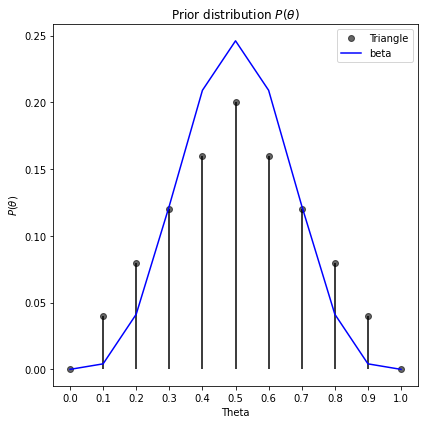

In [26]:
# prior estimates
from scipy.stats import triang, beta

theta = np.arange(0,1.1,.1)

# triangle priors
priors = triang.pdf(theta, prior)
priors = priors/sum(priors)
prior_df = pd.DataFrame({'theta':theta,'prior':priors})

# beta priors
priors_bb = beta.pdf(theta,5,5,)
priors_bb = priors_bb/sum(priors_bb)

fig,axs = plt.subplots(1,1,figsize=(6,6))
plot_p(axs,prior_df,'theta','prior','Prior distribution',label='Triangle')
axs.plot(theta,priors_bb,'b',label='beta')
plt.legend()
plt.tight_layout()

#### 4. Applying Bayes Theorem on observtional data

We toss our coin once and observe a tails. 

In [107]:
trials, tails, heads = 1,1,0
trials, tails, heads

(1, 1, 0)

Calling back to our formula: 
$$P(θ|Data) = \frac {P(Data|θ)P(θ)}{P(Data)}$$

1. We use the likelihood-function, or the binomial pmf, to estimate P(Data|θ). See references for a quick re-cap on likelihood functions.
1. We use the product of the prior and likelihood to obtain the marginal likelihood of the data P(Data). 
1. Combine all three to obtain the posterior P(Data|θ).

And we can see the calculated prios, likelihoods, and posterios in the table and plots below for our single obsrvations (Obs=1). Comparing the prior and posterior distributions show subtle changes based on our updated evidence from observed data. 

In [108]:
from scipy.stats import binom

df = pd.DataFrame({'tails':tails,
                   'heads':heads,
                   'theta':theta,
                   'prior':priors,
                   'likelihood':[(x**tails) * (1-x)**heads for x in theta],
                   'binom':binom.pmf(tails,trials,theta),
                  })
df['marginal'] = np.sum(df['likelihood']*df['prior'])
df['posterior'] = (df['likelihood']*df['prior']) / df['marginal']
df

,tails,heads,theta,prior,likelihood,binom,marginal,posterior
0,1,0,0.0,0.00,0.0,0.0,0.5,0.000
1,1,0,0.1,0.04,0.1,0.1,0.5,0.008
2,1,0,0.2,0.08,0.2,0.2,0.5,0.032
3,1,0,0.3,0.12,0.3,0.3,0.5,0.072
4,1,0,0.4,0.16,0.4,0.4,0.5,0.128
5,1,0,0.5,0.20,0.5,0.5,0.5,0.200
6,1,0,0.6,0.16,0.6,0.6,0.5,0.192
7,1,0,0.7,0.12,0.7,0.7,0.5,0.168
8,1,0,0.8,0.08,0.8,0.8,0.5,0.128
9,1,0,0.9,0.04,0.9,0.9,0.5,0.072


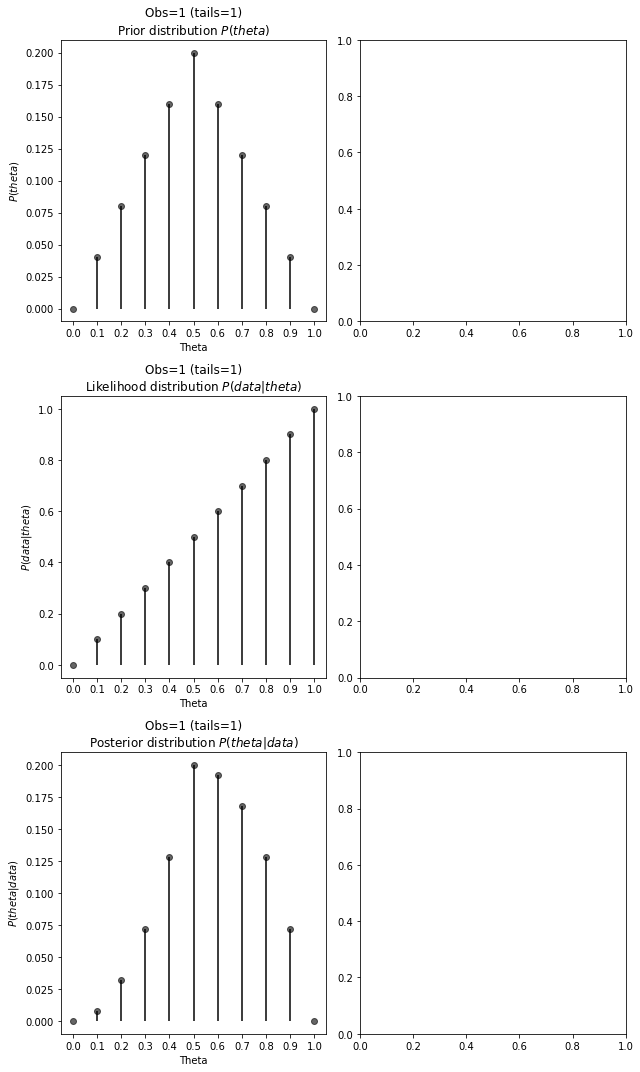

In [109]:
fig,axs = plt.subplots(3,2,figsize=(9,15))
plot_p(axs[0,0],df,'theta','prior','Obs=1 (tails=1)\nPrior distribution',ylab='$P(theta)$')
plot_p(axs[1,0],df,'theta','likelihood','Obs=1 (tails=1)\nLikelihood distribution',ylab='$P(data|theta)$')
plot_p(axs[2,0],df,'theta','posterior','Obs=1 (tails=1)\nPosterior distribution',ylab='$P(theta|data)$')

plt.tight_layout()

Examining the posterior distribution we see a peak at 0.5, in line with our prior belief in the triangle distribution. Similar to frequentist methods we can estimate [credible intervals (CI)](https://en.wikipedia.org/wiki/Credible_interval#Choosing_a_credible_interval). For instance we see that:
- 92 % CI between theta 0.2 and 0.8
- 52% CI between theta 0.4 and 0.6

Similarly we can use the integral of the area under curve to show:
- $P(θ|data) > 0.4$ is 88%.

In [127]:
c1,c2,p1 = (
        df.loc[(df['theta']>=0.20)&(df['theta']<=0.80),'posterior'].sum(),
        df.loc[(df['theta']>=0.39)&(df['theta']<=0.61),'posterior'].sum(),
        df.loc[(df['theta']>=0.39),'posterior'].sum()
)
print(f"CI 0.2-0.8 = {c1:.2f}\nCI 0.4-0.6 = {c2:.2f}\nP(theta|data)>0.4 = {p1:.2f}")

CI 0.2-0.8 = 0.92
CI 0.4-0.6 = 0.52
P(theta|data)>0.4 = 0.89 


Let's now toss the coin 20 times and compare our initial (Obs=1) and updated (Obs=20) estimates. 

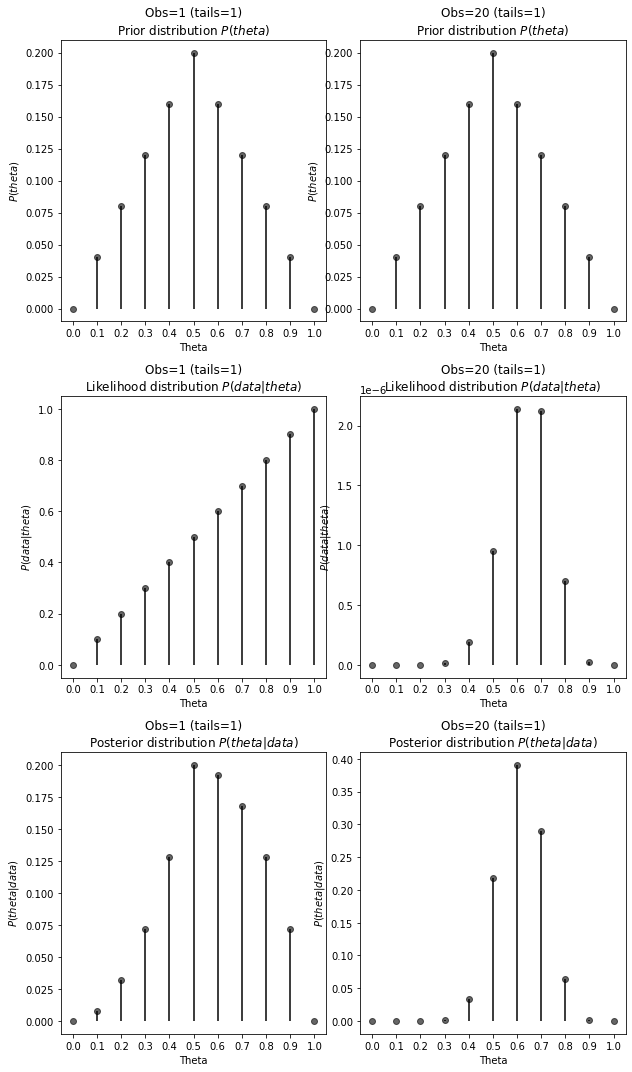

<Figure size 432x288 with 0 Axes>

In [128]:
trials, tails, heads = 20,13,7
df = pd.DataFrame({'tails':tails,
                   'heads':heads,
                   'theta':theta,
                   'prior':priors,
                   'likelihood':[(x**tails) * (1-x)**heads for x in theta],
                   'binom':binom.pmf(tails,trials,theta),
                  })
df['marginal'] = np.sum(df['likelihood']*df['prior'])
df['posterior'] = (df['likelihood']*df['prior']) / df['marginal']
plot_p(axs[0,1],df,'theta','prior','Obs=20 (tails=1)\nPrior distribution',ylab='$P(theta)$')
plot_p(axs[1,1],df,'theta','likelihood','Obs=20 (tails=1)\nLikelihood distribution',ylab='$P(data|theta)$')
plot_p(axs[2,1],df,'theta','posterior','Obs=20 (tails=1)\nPosterior distribution',ylab='$P(theta|data)$')
plt.tight_layout()
fig

And again check our Credible Intervals and integrals. 

In [129]:
c1,c2,p1 = (
        df.loc[(df['theta']>=0.20)&(df['theta']<=0.80),'posterior'].sum(),
        df.loc[(df['theta']>=0.39)&(df['theta']<=0.61),'posterior'].sum(),
        df.loc[(df['theta']>=0.39),'posterior'].sum()
)
print(f"CI 0.2-0.8 = {c1:.2f}\nCI 0.4-0.6 = {c2:.2f}\nP(theta|data)>0.4 = {p1:.2f}")

CI 0.2-0.8 = 1.00
CI 0.4-0.6 = 0.64
P(theta|data)>0.4 = 1.00


### Conclusion

In this post I have recapped on Bayes theorem, and shown how to manually apply bayes theorem for bayesian inference of the binomial distribution on a coin tossing example.

### references

- https://ro-che.info/articles/2016-06-14-predicting-coin-toss
- https://www.vosesoftware.com/riskwiki/Bayesiananalysisexampleidentifyingaweightedcoin.php
- https://www.analyticsvidhya.com/blog/2016/06/bayesian-statistics-beginners-simple-english/
- https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348
- https://www.ritchievink.com/blog/2019/06/10/bayesian-inference-how-we-are-able-to-chase-the-posterior/
- https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood
- https://en.wikipedia.org/wiki/Credible_interval#Choosing_a_credible_interval



#### Quick recap on the [Likelihood function](https://en.wikipedia.org/wiki/Likelihood_function#Example)

In [ ]:
# likelihood function 
# likelihood of two heads given x, p(HH|ph = x)
# https://en.wikipedia.org/wiki/Likelihood_function#Example
X = np.arange(0,1.1,0.1)
plt.plot(X,[x**2 for x in X]) # likelihood p(HH|x)
plt.plot(X,[(x**2)*(1-x)for x in X]) # likelihood p(HHT|x)
plt.plot(X,[(x**2)*(1-x)**2 for x in X]) # likelihood p(HHTT|x)